# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [8]:
!pip install mlflow -q

In [9]:
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import os

import tensorflow as tf
from keras.layers import Dense, LSTM

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [14]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Download latest version
path = kagglehub.dataset_download("muhamedumarjamil/crypto-and-gold-prices-dataset-20152025")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/crypto-and-gold-prices-dataset-20152025


In [15]:
 = pd.read_csv('/kaggle/input/df/crypto-and-gold-prices-dataset-20152025/Crypto Data Since 2015.csv')
df.head()

,Date,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL)
0,2015-01-01,1099.671415,102.760097,1199.071870,0.490443,19.915520,0.209481,0.045930,5.987009
1,2015-01-02,1135.844985,110.806193,1201.928708,0.526877,20.271863,0.222041,0.054818,5.687508
2,2015-01-03,1250.613839,116.286699,1201.829678,0.520009,19.974075,0.229863,0.049255,7.050012
3,2015-01-04,1452.916825,118.393314,1199.858272,0.563435,19.942816,0.243224,0.047298,7.903578
4,2015-01-05,1479.501487,128.322865,1200.014190,0.644235,20.201745,0.238137,0.044584,8.140522


In [16]:
# Date ke datetime & set index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

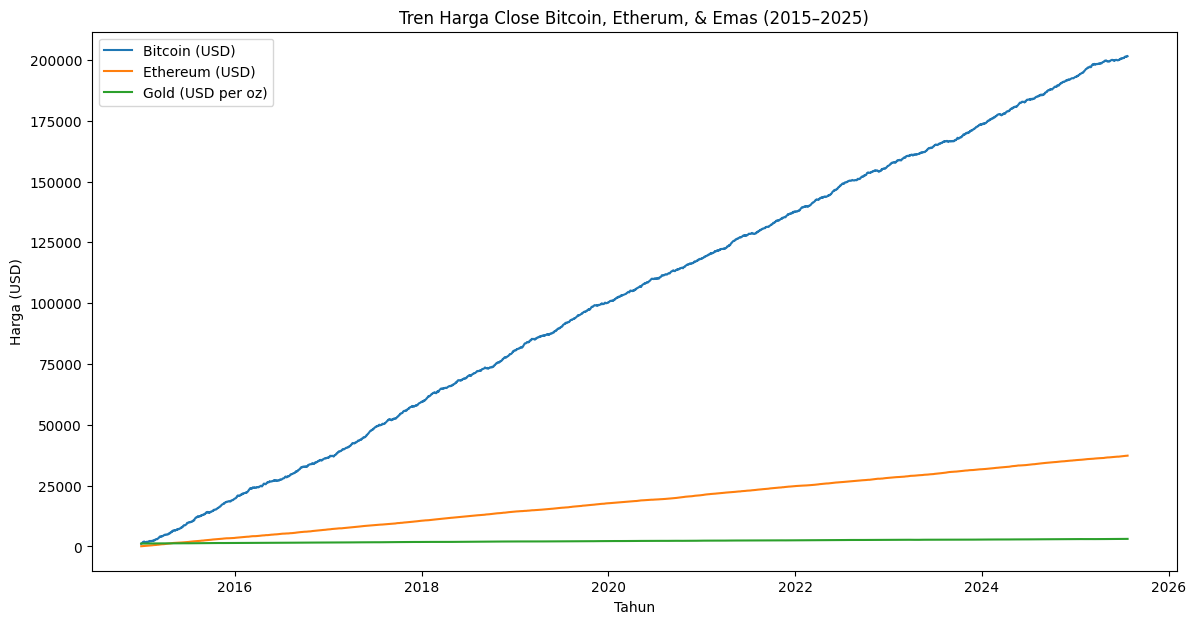

In [17]:
# Visualisasi Tren Harga
plt.figure(figsize=(14, 7))
symbols_to_plot = ["Bitcoin (USD)", "Ethereum (USD)", "Gold (USD per oz)"]
for symbol in symbols_to_plot:
    plt.plot(
        df.index,
        df[symbol],
        label=symbol
    )
plt.title("Tren Harga Close Bitcoin, Etherum, & Emas (2015–2025)")
plt.xlabel("Tahun")
plt.ylabel("Harga (USD)")
plt.legend()
plt.show()

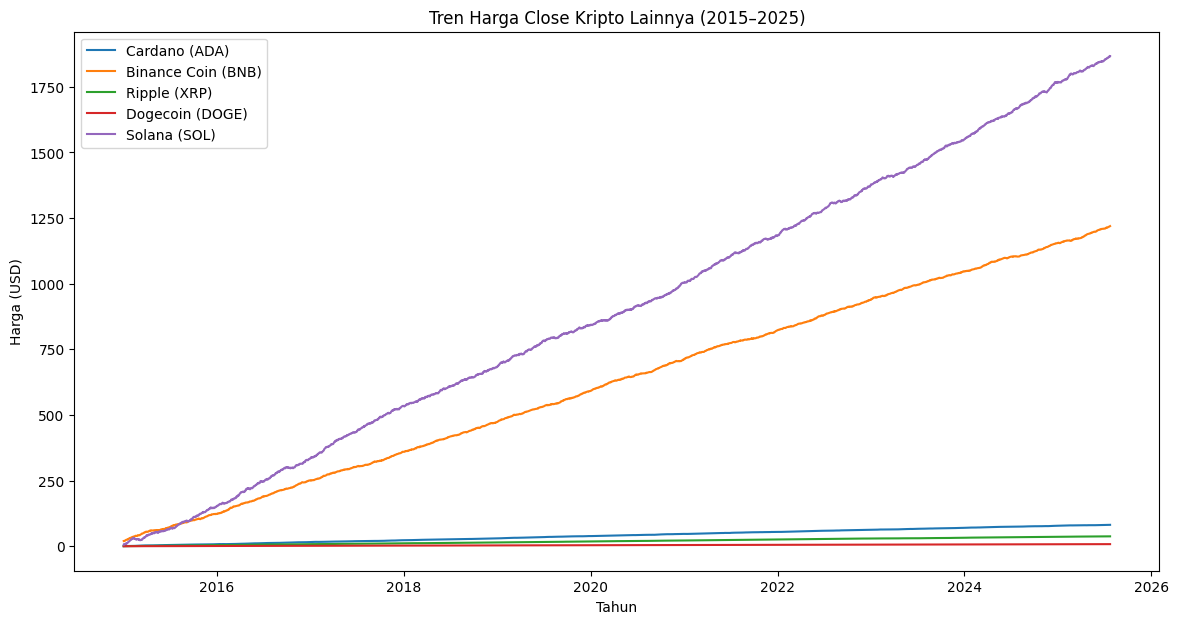

In [18]:
# Visualisasi Tren Harga
plt.figure(figsize=(14, 7))
symbols_to_plot = ["Cardano (ADA)", "Binance Coin (BNB)", "Ripple (XRP)", "Dogecoin (DOGE)", "Solana (SOL)"]
for symbol in symbols_to_plot:
    plt.plot(
        df.index,
        df[symbol],
        label=symbol
    )
plt.title("Tren Harga Close Kripto Lainnya (2015–2025)")
plt.xlabel("Tahun")
plt.ylabel("Harga (USD)")
plt.legend()
plt.show()

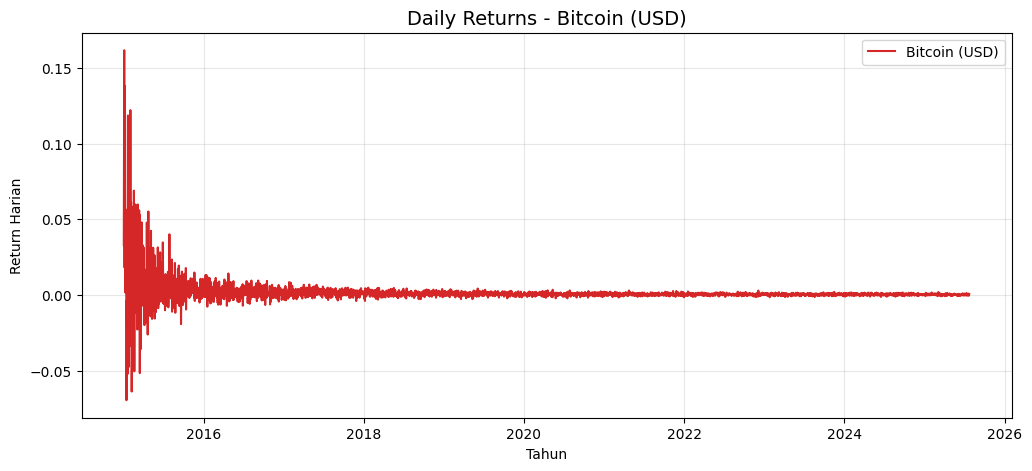

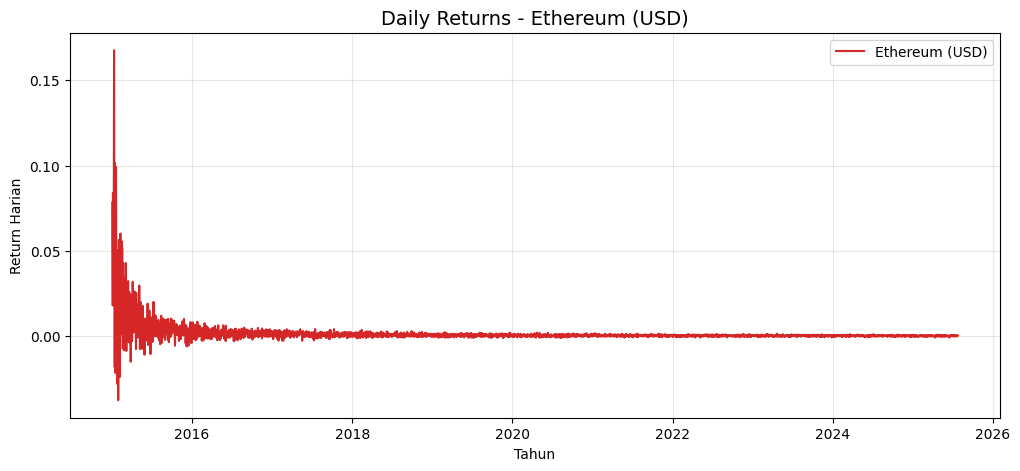

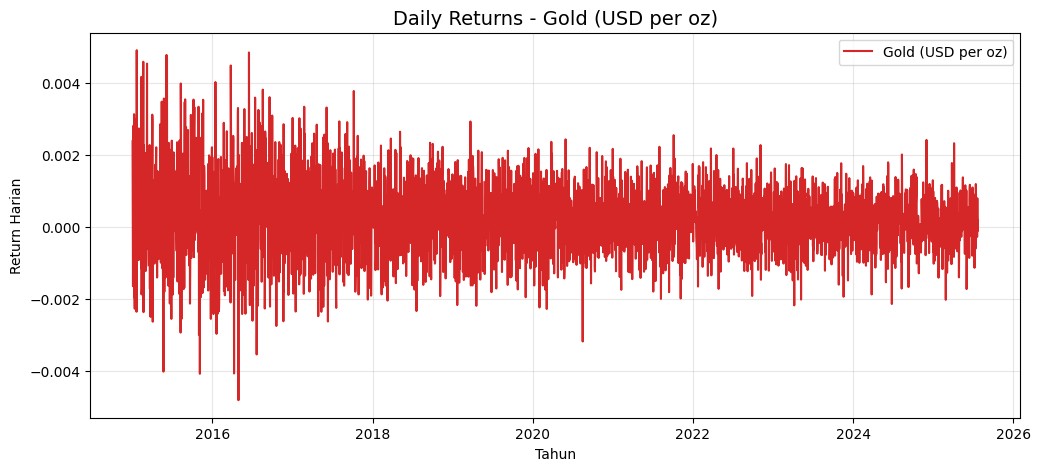

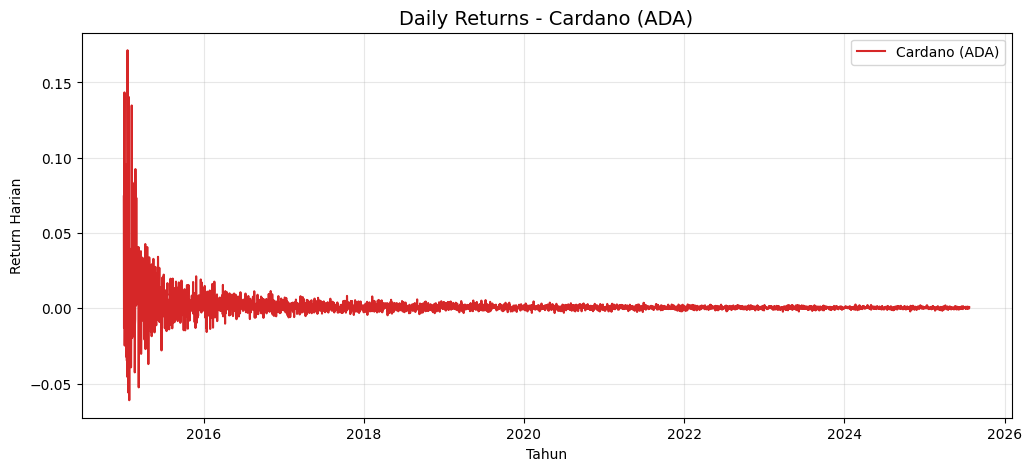

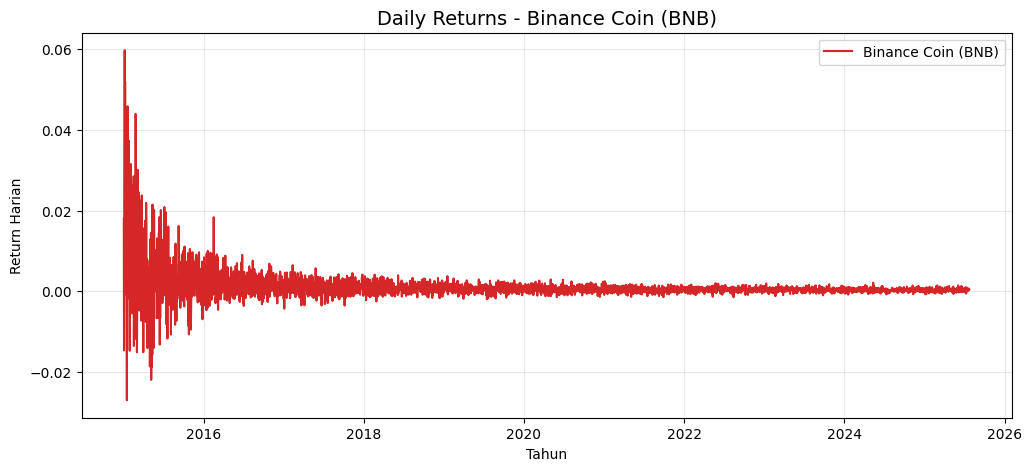

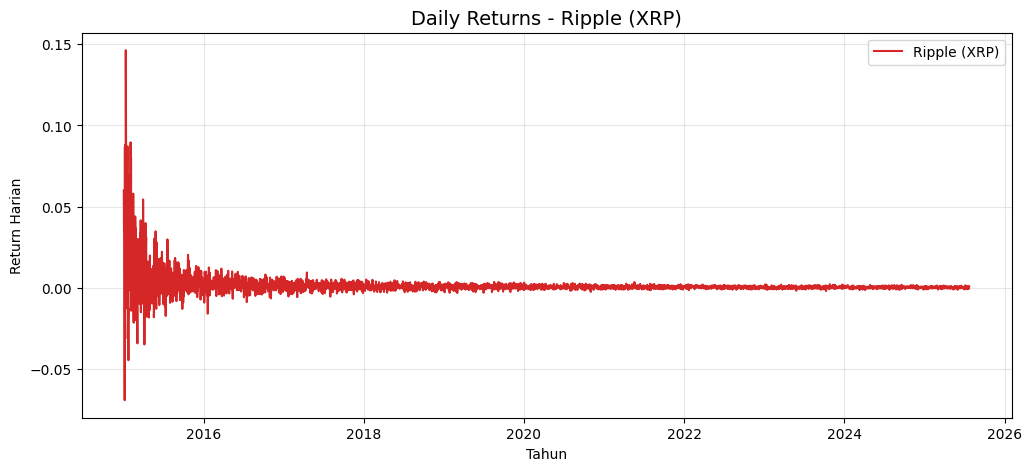

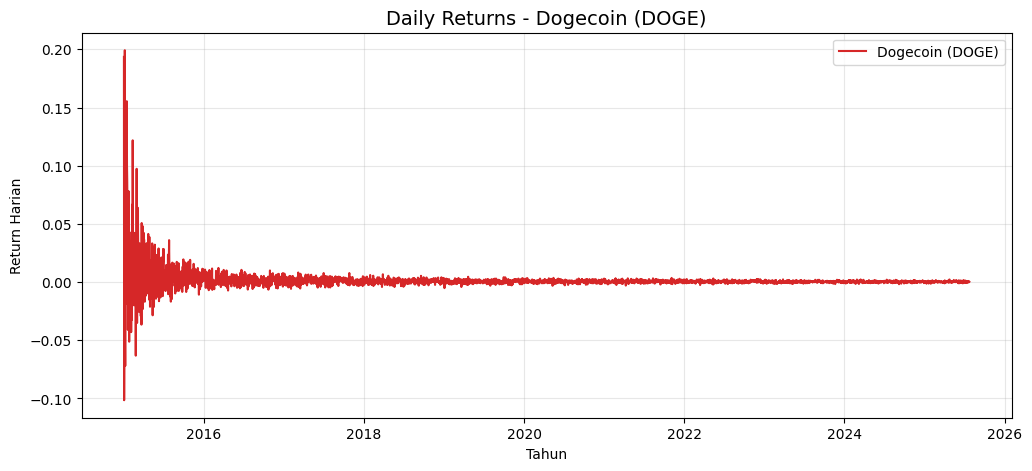

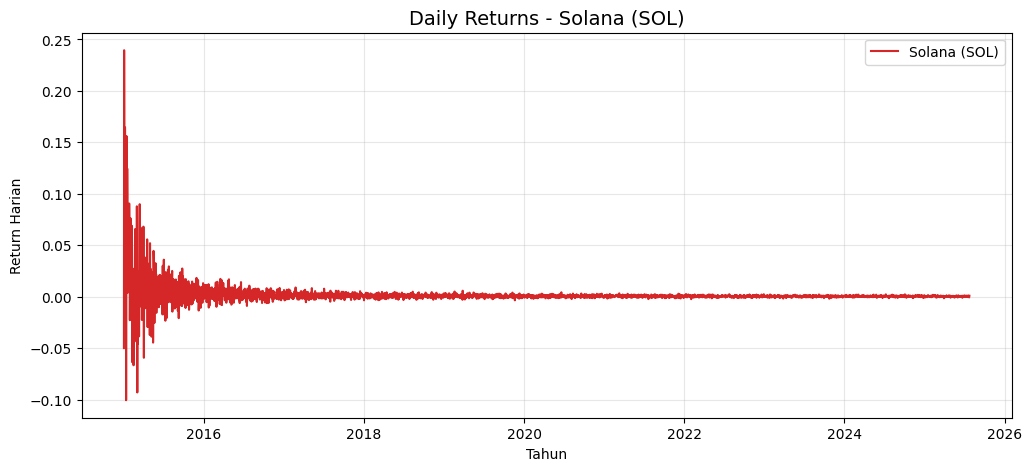

In [20]:
# Calculate daily returns
daily_returns = df.pct_change().dropna()

# Loop to display the daily returns plot for each crypto
for column in daily_returns.columns:
    plt.figure(figsize=(12, 5))
    plt.plot(daily_returns.index, daily_returns[column], label=f"{column}", color="tab:red")

    plt.title(f"Daily Returns - {column}", fontsize=14)
    plt.xlabel("Tahun")
    plt.ylabel("Return Harian")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

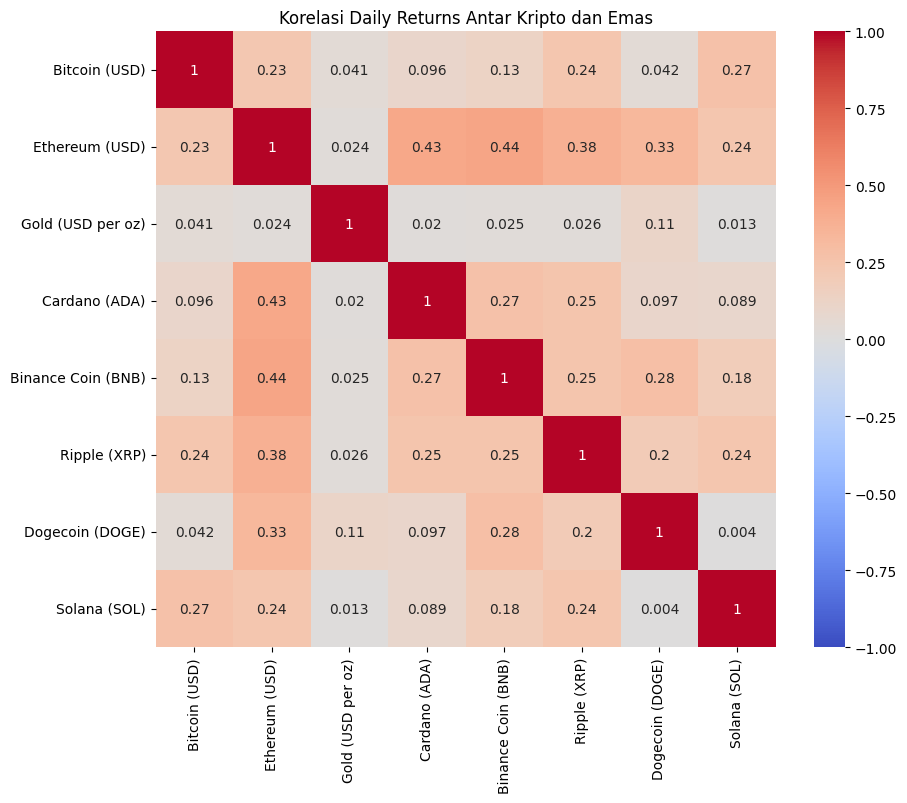

In [21]:
correlation_matrix = daily_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasi Daily Returns Antar Kripto dan Emas")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [22]:
# Melihat missing value
df.isnull().sum()

,0
Bitcoin (USD),0
Ethereum (USD),0
Gold (USD per oz),0
Cardano (ADA),0
Binance Coin (BNB),0
Ripple (XRP),0
Dogecoin (DOGE),0
Solana (SOL),0


In [23]:
# Melihat data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


In [24]:
df.describe()

,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL)
count,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000
mean,103295.091119,18646.484019,2219.843587,41.150393,623.130826,19.308745,3.931897,906.933311
std,59086.885281,10770.200525,540.896499,23.796932,348.628727,10.848451,2.257275,532.415463
min,1099.671415,102.760097,1199.071870,0.490443,19.915520,0.209481,0.044584,5.687508
25%,51775.591274,9183.157088,1766.802440,20.141836,313.600483,9.928481,2.004034,468.198474
50%,105376.860438,18646.902925,2256.204837,40.974391,631.888911,19.377614,3.767681,884.089973
75%,154587.897710,27888.634698,2697.102069,62.185396,928.463897,29.273697,5.929516,1361.069455
max,201506.238999,37333.366859,3119.461819,81.532909,1219.517885,37.667654,7.971408,1866.601974


In [25]:
def normalize_series(data, min, max):
    data = data - min
    data = data / max
    return data
data = df.values
data = normalize_series(data, data.min(axis=0), data.max(axis=0))

In [26]:
selected_columns = ["Bitcoin (USD)", "Ethereum (USD)", "Gold (USD per oz)", "Cardano (ADA)", "Binance Coin (BNB)", "Ripple (XRP)", "Dogecoin (DOGE)", "Solana (SOL)"]
N_FEATURES = len(selected_columns)
print("jumlah fitur yang digunakan:", N_FEATURES)

jumlah fitur yang digunakan: 8


In [27]:
def windowed_dataset(series, batch_size, n_past=24, n_future=24, shift=1):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=n_past + n_future, shift=shift, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future))
    ds = ds.map(lambda w: (w[:n_past], w[n_past:]))
    return ds.batch(batch_size).prefetch(1)

In [30]:
# Split data into training and validation sets
train_size = int(len(data) * 0.8)
x_train, x_valid = data[0:train_size], data[train_size:]

In [31]:
BATCH_SIZE = 32
N_PAST = 30
N_FUTURE = 30
SHIFT = 1
# Kode untuk membuat windowed datasets
train_set = windowed_dataset(series=x_train, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)
valid_set = windowed_dataset(series=x_valid, batch_size=BATCH_SIZE,
                                 n_past=N_PAST, n_future=N_FUTURE,
                                 shift=SHIFT)

# Modelling

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(N_PAST, N_FEATURES)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(N_FUTURE * N_FEATURES), # Change units to N_FUTURE * N_FEATURES
    tf.keras.layers.Reshape((N_FUTURE, N_FEATURES))
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('mae') < 0.055 and logs.get('val_mae') < 0.055):
                self.model.stop_training = True

callbacks = myCallback()

In [34]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mae',
                  optimizer= optimizer,
                  metrics=["mae"])

In [35]:
model.fit(train_set,
          validation_data=(valid_set),
          epochs=100,
          callbacks=callbacks,
          verbose=1
    )

Epoch 1/100
     91/Unknown 5s 12ms/step - loss: 0.0566 - mae: 0.0566

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0559 - mae: 0.0559 - val_loss: 0.0927 - val_mae: 0.0927
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1140 - mae: 0.1140 - val_loss: 0.0840 - val_mae: 0.0840
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0897 - mae: 0.0897 - val_loss: 0.0741 - val_mae: 0.0741
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0622 - mae: 0.0622 - val_loss: 0.0639 - val_mae: 0.0639
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0178 - mae: 0.0178 - val_loss: 0.0707 - val_mae: 0.0707
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0213 - mae: 0.0213 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0126 - mae: 0.0126 - val_loss: 0.0605 - val_mae: 0.0605
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0129 - mae: 0.0129 - val_loss: 0.0568 - val_mae: 0.0568
Epoch 9/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0127 -

In [36]:
train_pred = model.predict(train_set)
train_pred[0][0]

95/95 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step


array([0.04846733, 0.04418507, 0.04445335, 0.04191132, 0.03056934,
       0.04867335, 0.02791522, 0.04777482], dtype=float32)

95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


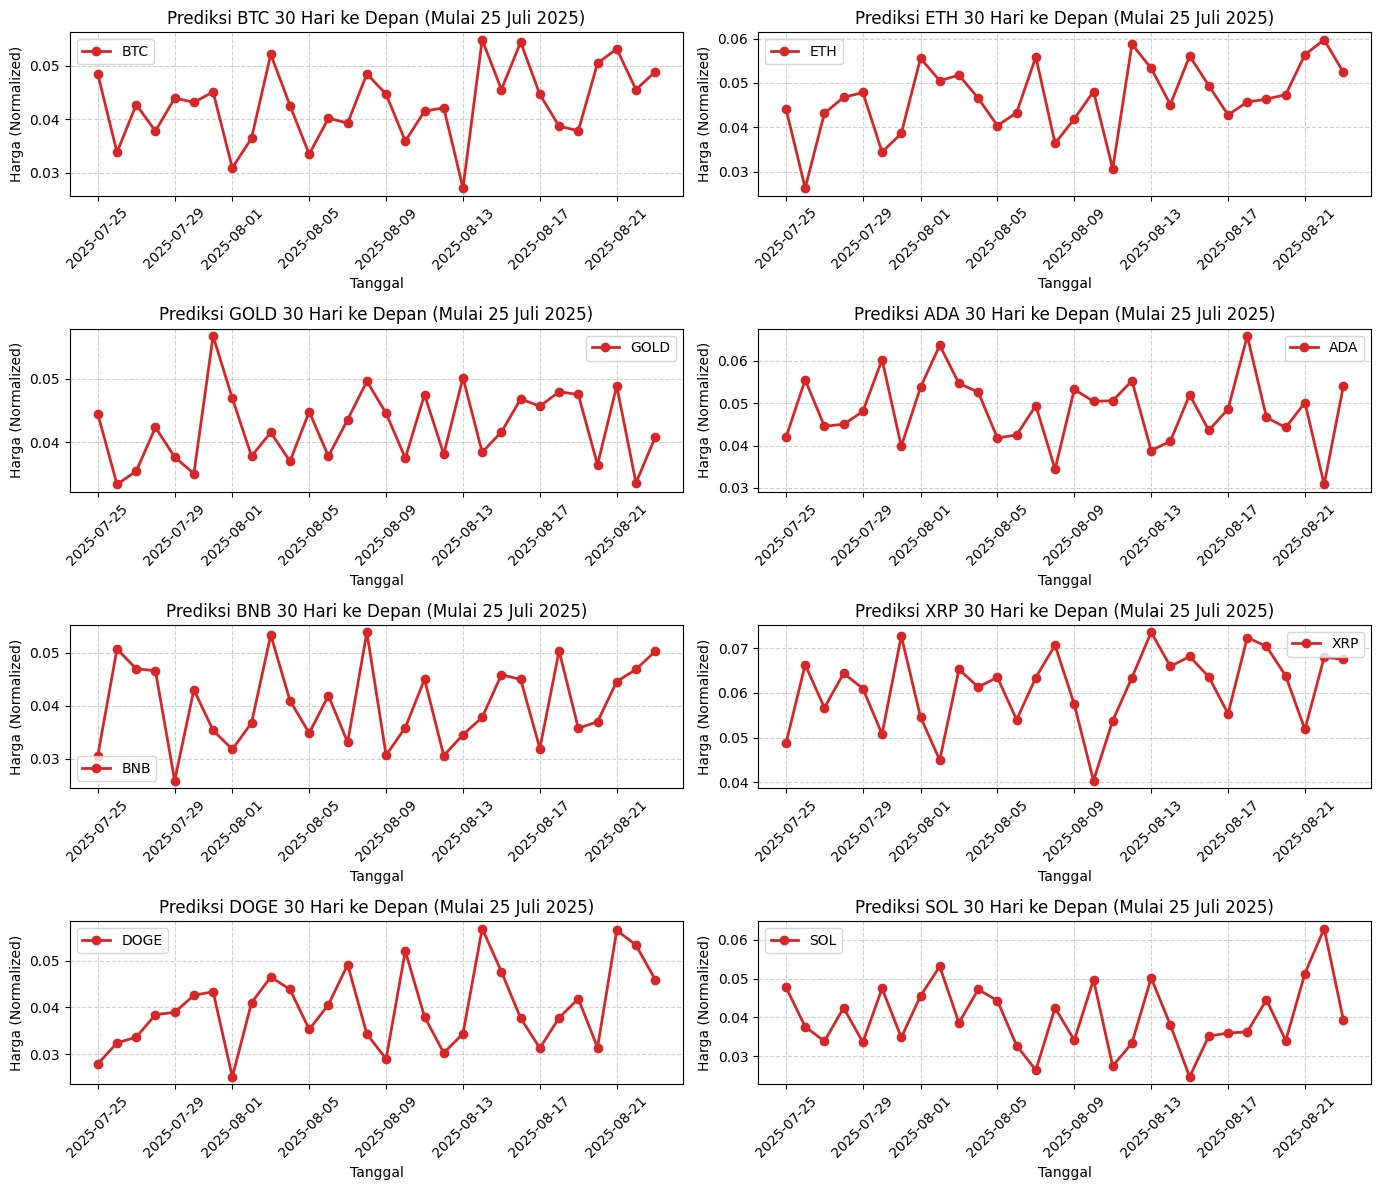

In [37]:
crypto_names = ["BTC", "ETH", "GOLD", "ADA", "BNB", "XRP", "DOGE", "SOL"]
train_pred = model.predict(train_set)
predictions = train_pred[0]   # shape (N_FUTURE, n_crypto)

# Data tanggal
last_date = pd.to_datetime("2025-07-24")   # data terakhir
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=len(predictions), freq="D")

# Visualisasi Subplot
n_crypto = len(crypto_names)
n_cols = 2
n_rows = int(np.ceil(n_crypto / n_cols))

plt.figure(figsize=(14, 3 * n_rows))

for i, crypto in enumerate(crypto_names):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(future_dates, predictions[:, i], marker="o",  linewidth=2, label=crypto, color="tab:red")
    plt.title(f"Prediksi {crypto} 30 Hari ke Depan (Mulai 25 Juli 2025)")
    plt.xlabel("Tanggal")
    plt.ylabel("Harga (Normalized)")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()

plt.tight_layout()
plt.show()